In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
import theano as th
import theano.tensor as tt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import g3py as g3
import pymc3 as pm

#g3.style_seaborn()
#g3.style_normal()
g3.style_big()
#g3.style_big_seaborn()
g3.style_widget()

# Data

In [2]:
# Sunspots
x, y = g3.load_sunspots()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.15)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 46 (14.88673139158576%)


# BoxCoxGP

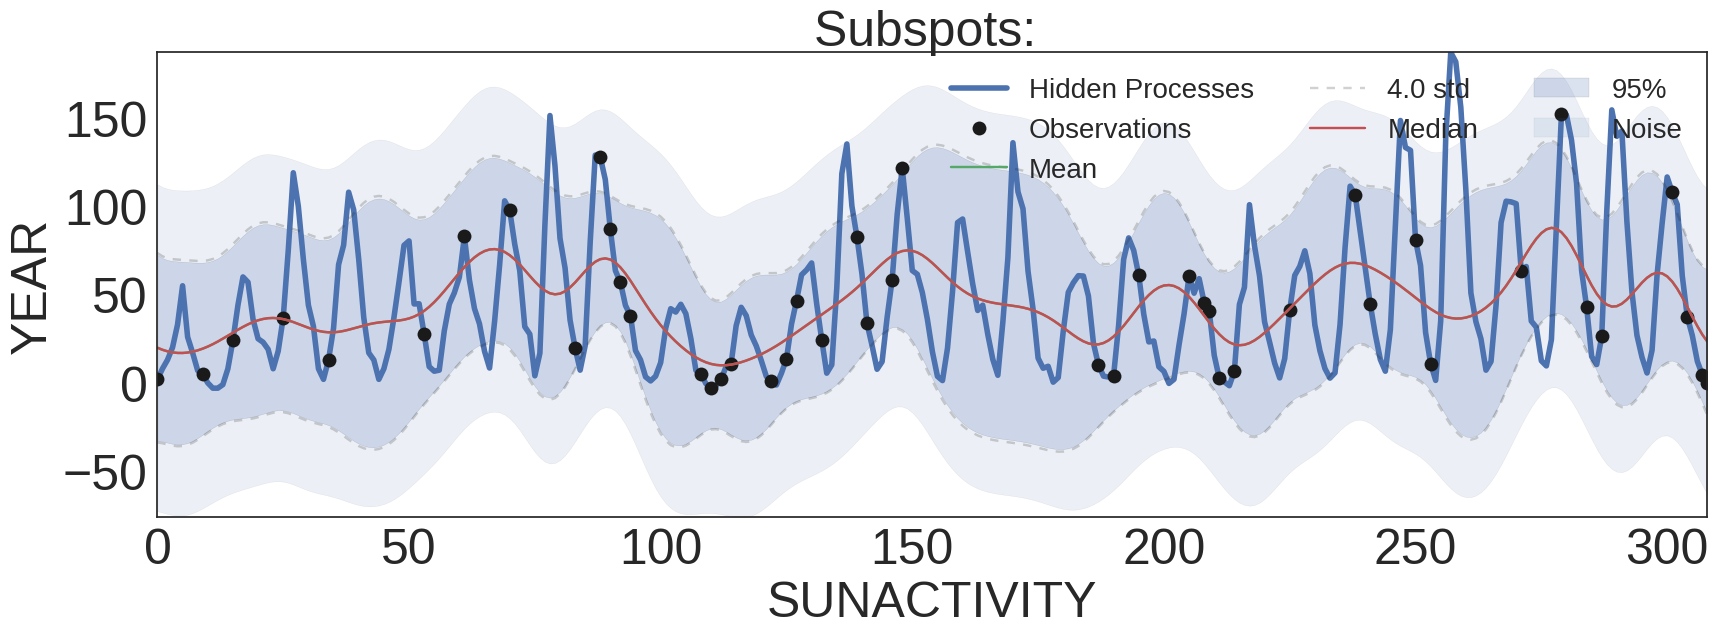

In [39]:
with g3.Model() as model:
    tgp = g3.TGP(x, g3.Bias(), g3.SE(x_obs), g3.BoxCoxShifted(y_obs), noise=True, hidden=y)
    tgp.describe('Subspots','SUNACTIVITY','YEAR')
    tgp.observed(x_obs,y_obs)
    tgp.testing(x_test,y_test)
    tgp.compile()
tgp.plot_tgp(tgp.find_default())

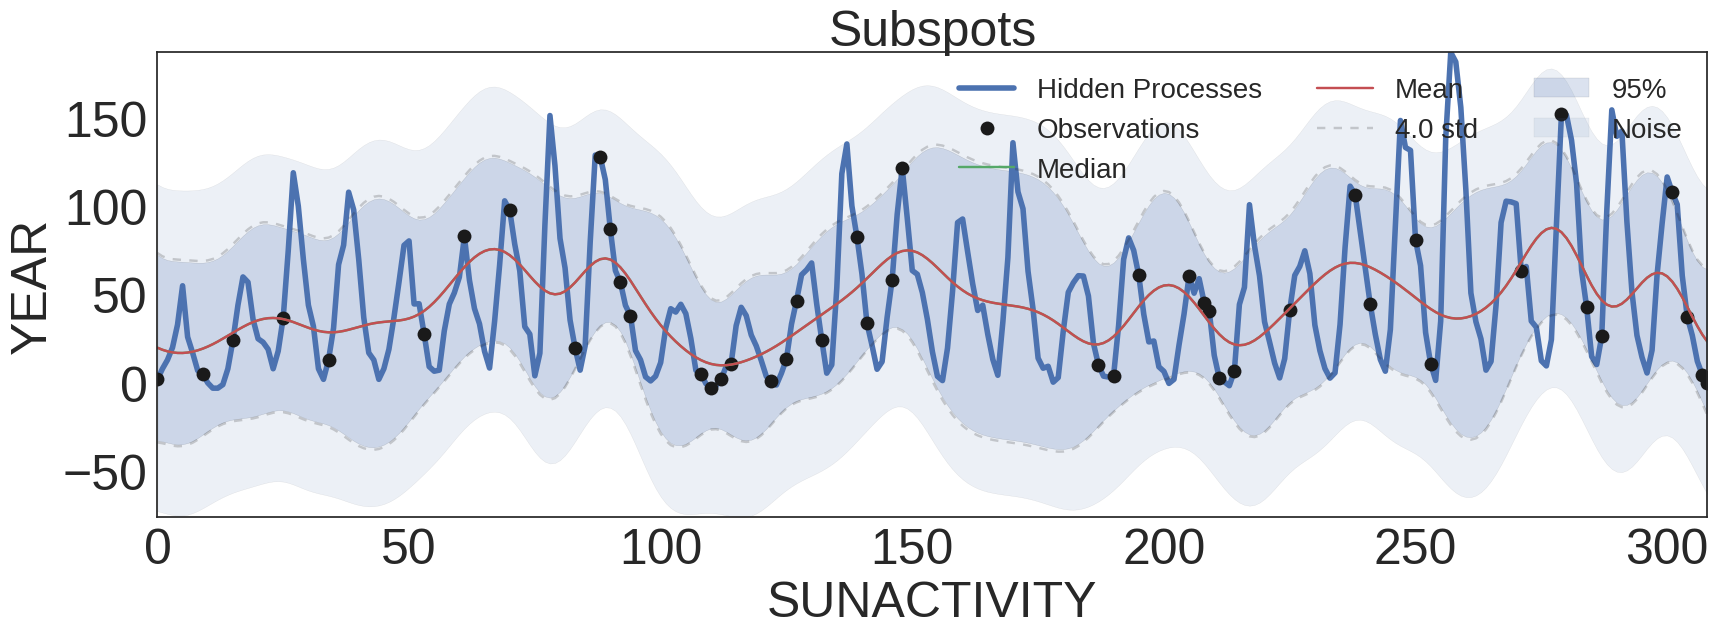

In [40]:
tgp.widget_params()

         Current function value: 225.173767
         Iterations: 13
         Function evaluations: 73
         Gradient evaluations: 66


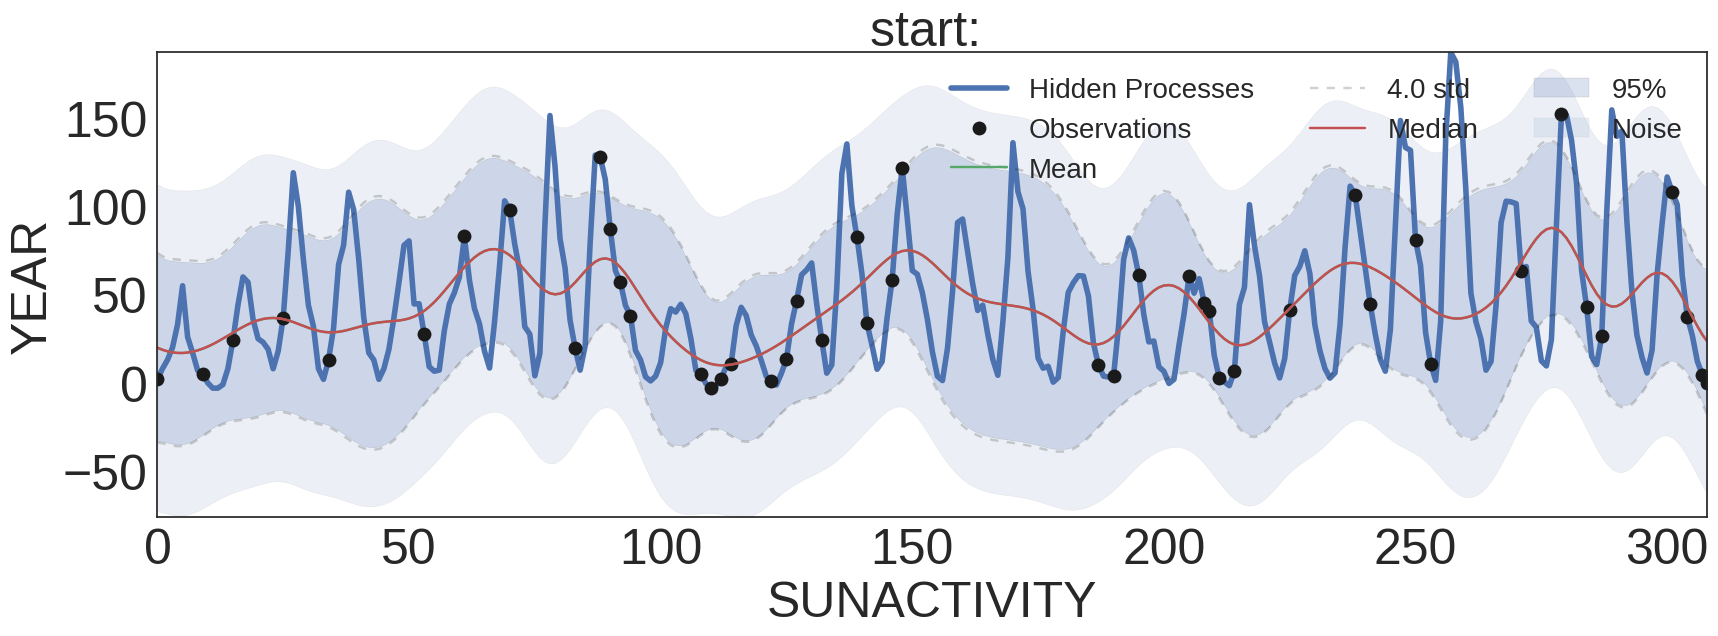

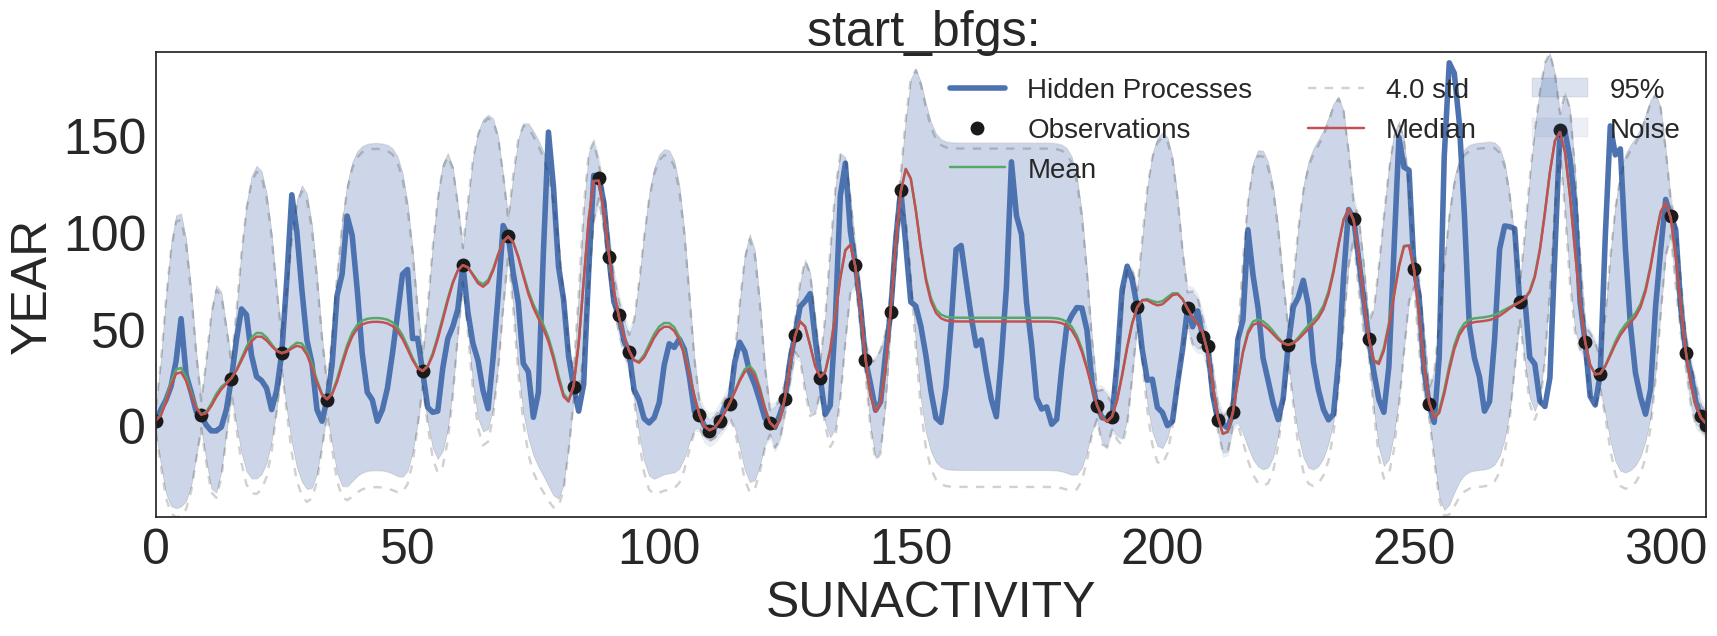

Optimization terminated successfully.
         Current function value: 227.403015
         Iterations: 11
         Function evaluations: 973


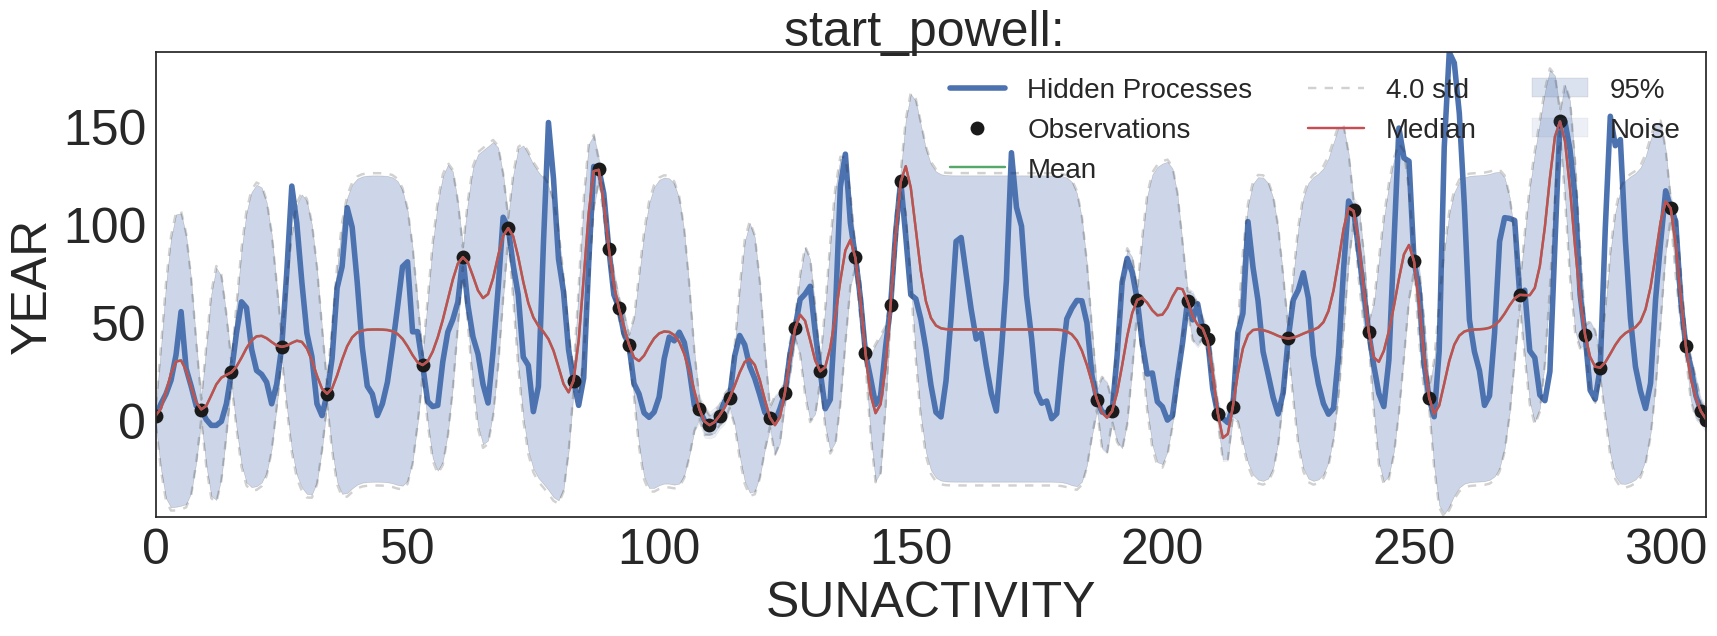

         Current function value: 225.044601
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 50


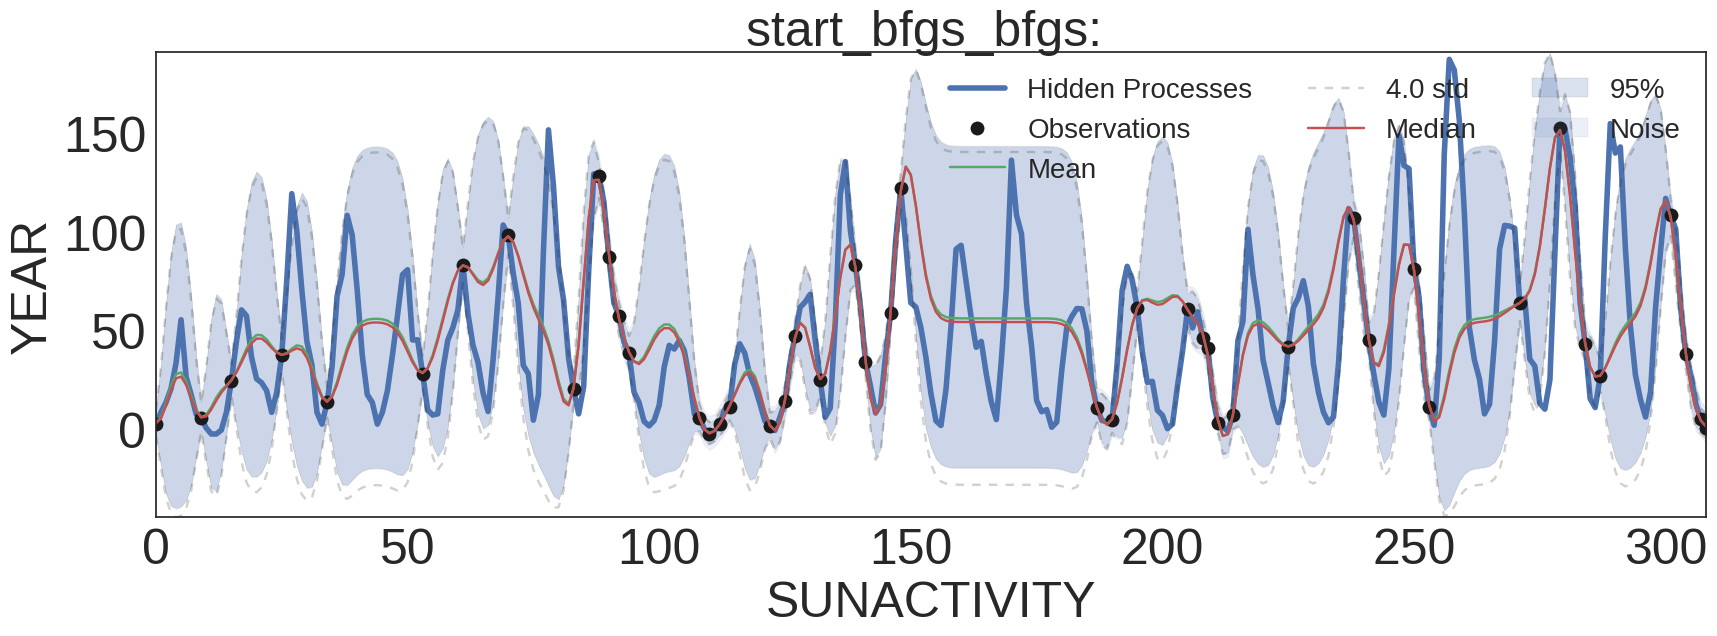

Optimization terminated successfully.
         Current function value: 192.263672
         Iterations: 14
         Function evaluations: 2148


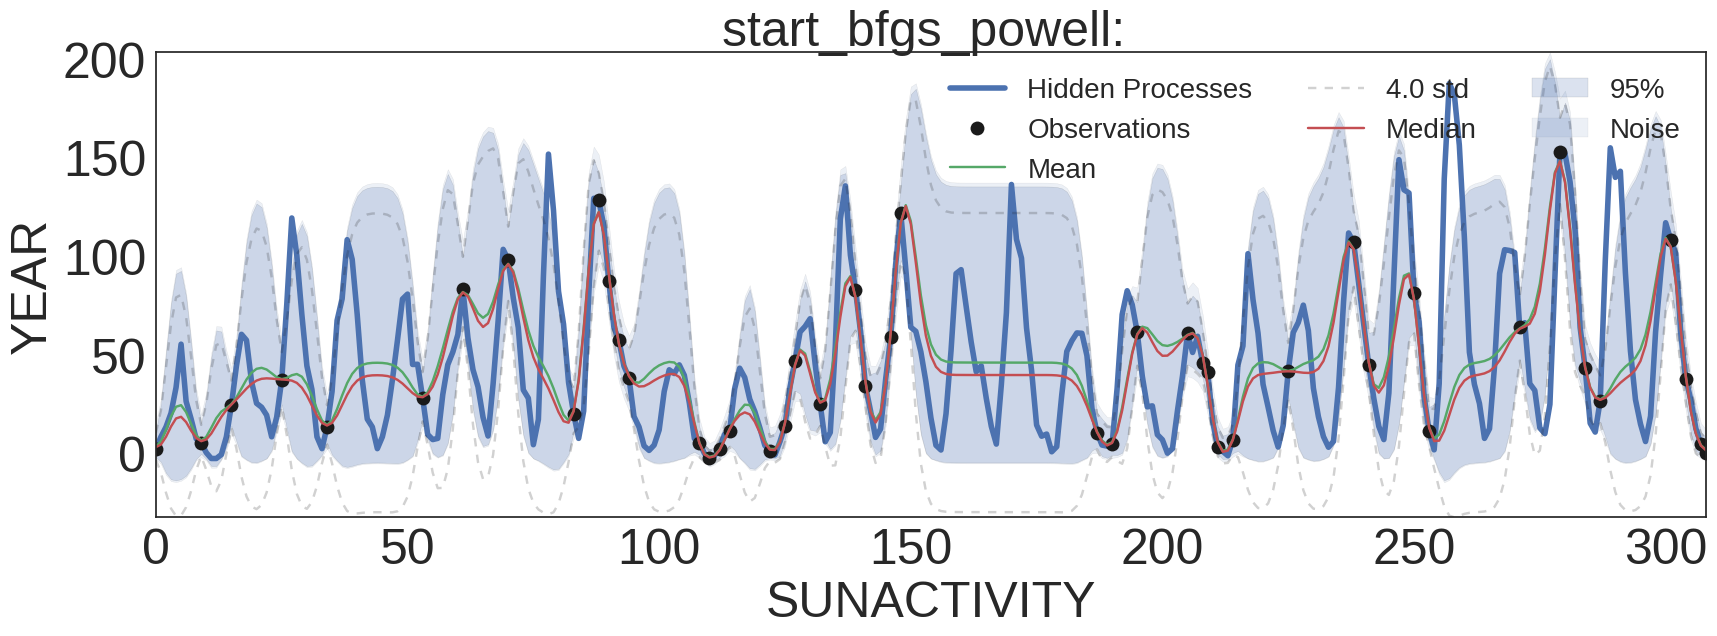

         Current function value: 215.151016
         Iterations: 152
         Function evaluations: 255
         Gradient evaluations: 250


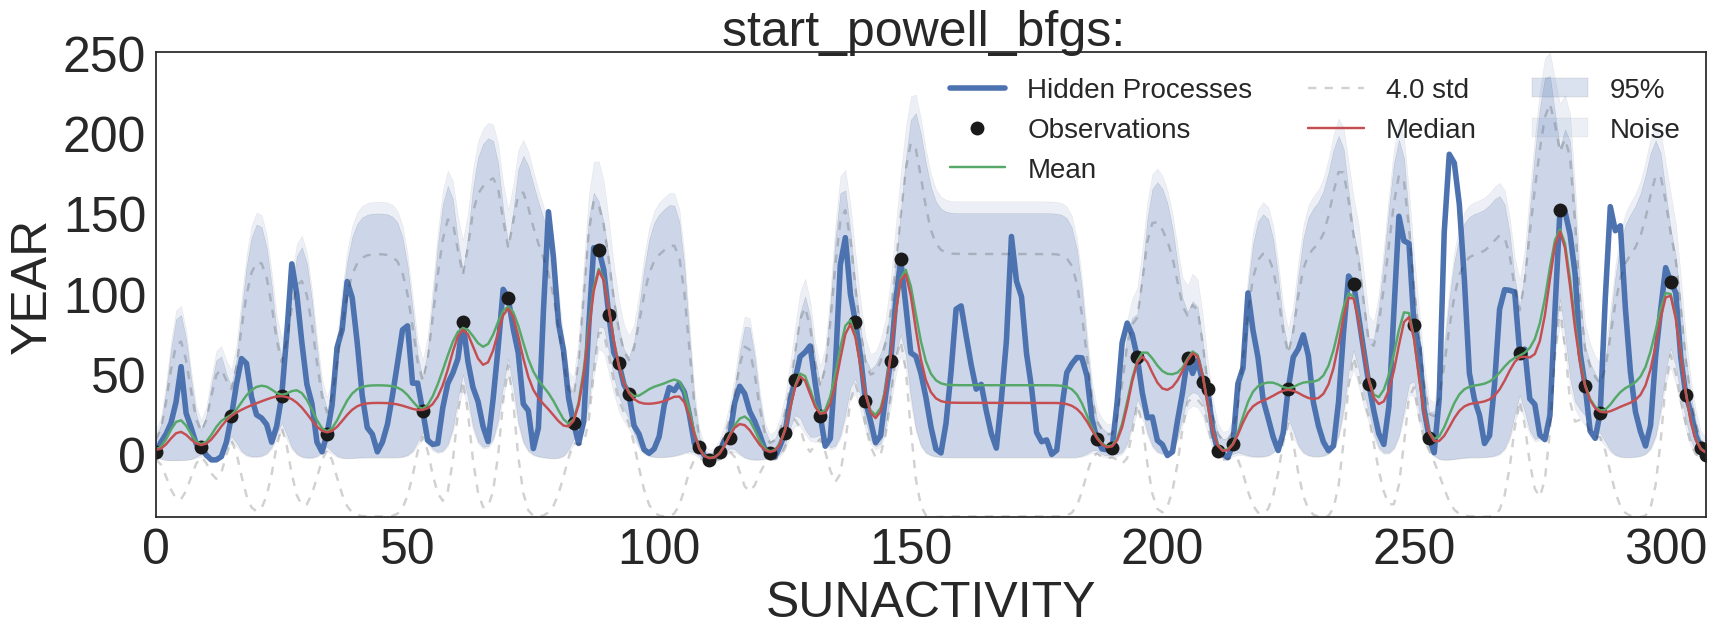

Optimization terminated successfully.
         Current function value: 227.274246
         Iterations: 3
         Function evaluations: 351


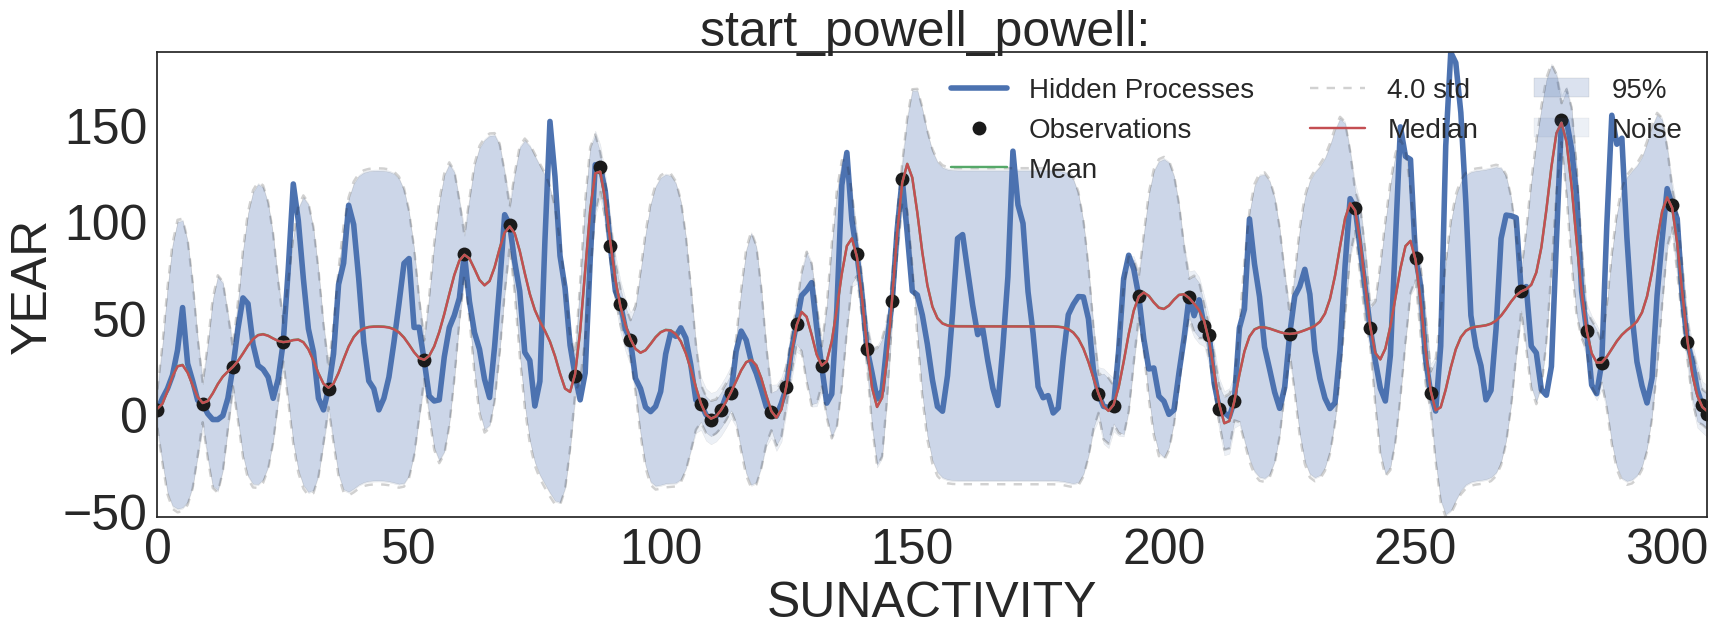

In [41]:
points = tgp.find_MAP(tgp.get_params(), 6, plot=True)

{'TGP_Bias_Constant': array(15.776923179626465, dtype=float32),
 'TGP_BoxCoxShifted_power_log_': array(-0.4400865435600281, dtype=float32),
 'TGP_BoxCoxShifted_shift': array(-2.7756081178882943e-32, dtype=float32),
 'TGP_Noise_Var_log_': array(1.2537083625793457, dtype=float32),
 'TGP_SE_ARD_L2_Scales_log_': array([ 1.02155507], dtype=float32),
 'TGP_SE_Var_log_': array(4.620802402496338, dtype=float32)}

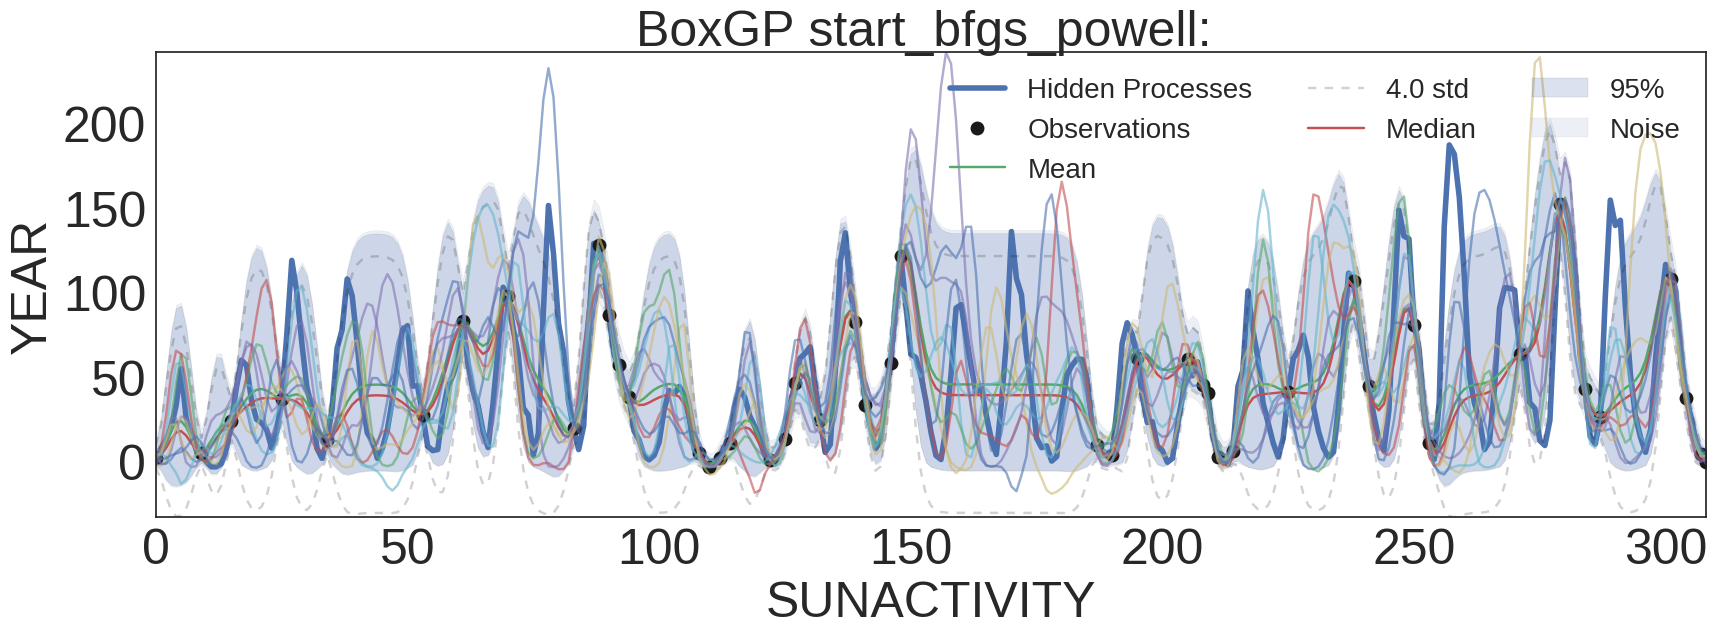

In [42]:
optimal = points[0]
for test in points:
    if test[1] > optimal[1]:
        optimal = test
name, logp, params = optimal

tgp.plot_tgp(params,'BoxGP '+name, samples=10)
g3.save_plot('bcgp_optimal.pdf')

params

In [10]:
traces = tgp.sample_hypers(start=tgp.get_params(), samples=5000)

AttributeError: 'float' object has no attribute 'ravel'

In [ ]:
g3.style_seaborn()
g3.traceplot(traces)

In [ ]:
datatraces = g3.datatrace(model, traces)
datatraces.describe().T

In [ ]:
items_ll = ['niter','ll']
items_mt = ['TGP_Bias_Constant','TGP_BoxCoxShifted_shift','TGP_SE_ARD_L2_Scales']
items_k = ['TGP_BoxCoxShifted_power', 'TGP_Noise_Var','TGP_SE_Var']

g3.plot_datatrace(datatraces,items_mt+items_k)
g3.plot_datatrace(datatraces,items_ll+items_mt)
g3.plot_datatrace(datatraces,items_ll+items_k)

In [ ]:
g3.style_seaborn()

In [ ]:
tgp.widget_trace(traces)

In [ ]:
tgp.plot_tgp(tgp.get_params(), samples=15)